## WINE QUALTITY PREDICTION

## importing module

In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## dataset

In [2]:
data=pd.read_csv("WineQT.csv")

In [31]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


## Visualization

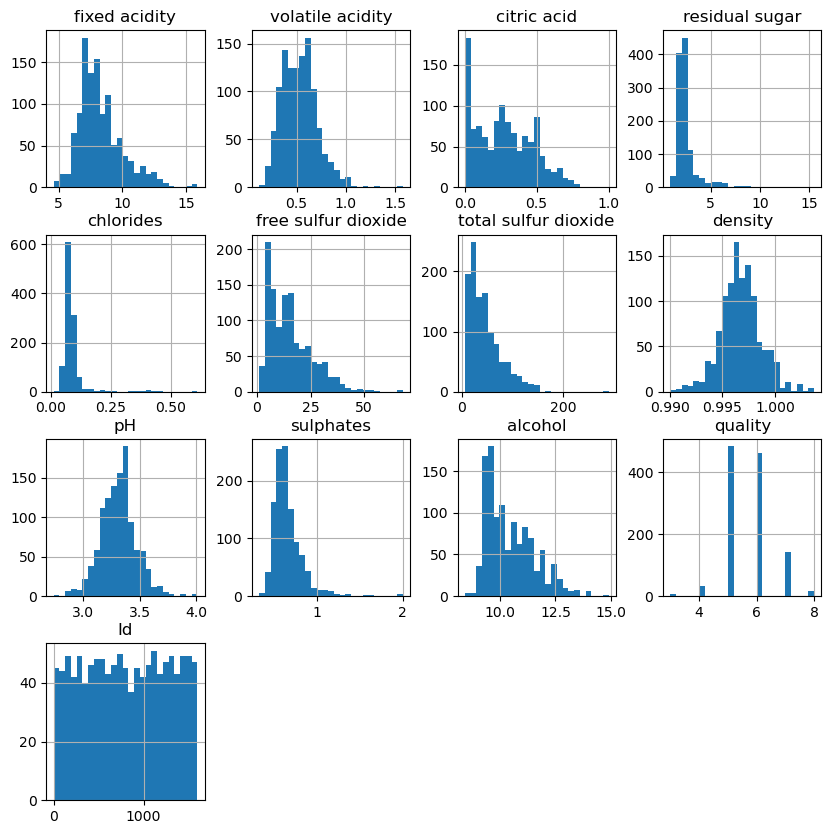

In [7]:
data.hist(bins=25,figsize=(10,10))
plt.show()

Text(0, 0.5, 'alcohol')

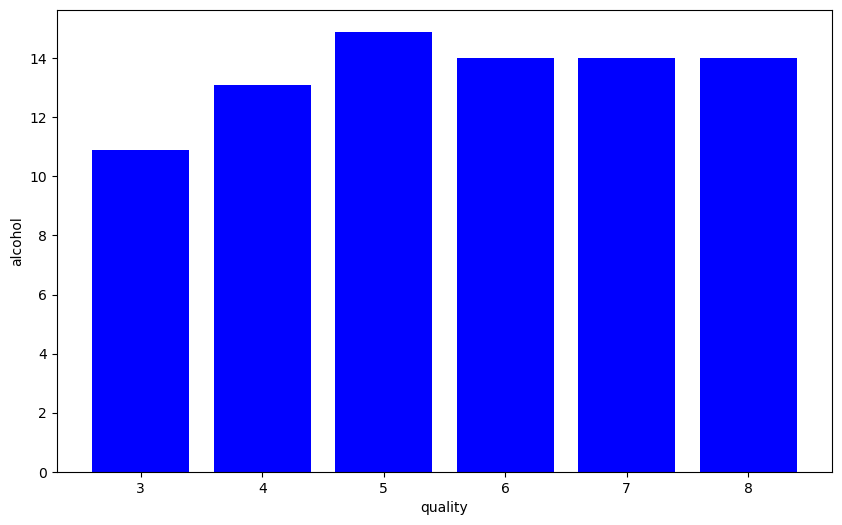

In [8]:
plt.figure(figsize=[10,6])
# plot bar graph
plt.bar(data['quality'],data['alcohol'],color='blue')
# label x-axis
plt.xlabel('quality')
#label y-axis
plt.ylabel('alcohol')

# making the datset into x and y where survived will be the y part

In [9]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [10]:
X=data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']]
Y=data['Id']

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [12]:
fixed_acidity_encoder=LabelEncoder()
volatile_acidity_encoder=LabelEncoder()
citric_acid_encoder=LabelEncoder()
residual_sugar_encoder=LabelEncoder()
chlorides_encoder=LabelEncoder()
free_sulfur_dioxide_encoder=LabelEncoder()
total_sulfur_dioxide_encoder=LabelEncoder()
density_encoder=LabelEncoder()
pH_encoder=LabelEncoder()
sulphates_encoder=LabelEncoder()
alcohol_encoder=LabelEncoder()
quality_encoder=LabelEncoder()


In [13]:
import warnings
warnings.filterwarnings('ignore')
fixed_acidity_encoder.fit(pd.DataFrame(X['fixed acidity']))
X['fixed acidity']=fixed_acidity_encoder.transform(X['fixed acidity'])

volatile_acidity_encoder.fit(pd.DataFrame(X['volatile acidity']))
X['volatile acidity']=volatile_acidity_encoder.transform(X['volatile acidity'])

citric_acid_encoder.fit(pd.DataFrame(X['citric acid']))
X['citric acid']=citric_acid_encoder.transform(X['citric acid'])

residual_sugar_encoder.fit(pd.DataFrame(X['residual sugar']))
X['residual sugar']=residual_sugar_encoder.transform(X['residual sugar'])

chlorides_encoder.fit(pd.DataFrame(X['chlorides']))
X['chlorides']=chlorides_encoder.transform(X['chlorides'])

free_sulfur_dioxide_encoder.fit(pd.DataFrame(X['free sulfur dioxide']))
X['free sulfur dioxide']=free_sulfur_dioxide_encoder.transform(X['free sulfur dioxide'])

total_sulfur_dioxide_encoder.fit(pd.DataFrame(X['total sulfur dioxide']))
X['total sulfur dioxide']=total_sulfur_dioxide_encoder.transform(X['total sulfur dioxide'])

density_encoder.fit(pd.DataFrame(X['density']))
X['density']=density_encoder.transform(X['density'])

pH_encoder.fit(pd.DataFrame(X['pH']))
X['pH']=pH_encoder.transform(X['pH'])

sulphates_encoder.fit(pd.DataFrame(X['sulphates']))
X['sulphates']=sulphates_encoder.transform(X['sulphates'])

alcohol_encoder.fit(pd.DataFrame(X['alcohol']))
X['alcohol']=alcohol_encoder.transform(X['alcohol'])

quality_encoder.fit(pd.DataFrame(X['quality']))
X['quality']=quality_encoder.transform(X['quality'])


In [14]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,25,74,0,10,39,9,28,305,62,17,10,2
1,29,110,0,20,61,23,61,246,31,29,15,2
2,29,86,4,17,55,13,48,260,37,26,15,2
3,62,12,56,10,38,15,54,315,27,19,15,3
4,25,74,0,10,39,9,28,305,62,17,10,2


In [15]:
X['quality'].value_counts()

quality
2    483
3    462
4    143
1     33
5     16
0      6
Name: count, dtype: int64

<Axes: >

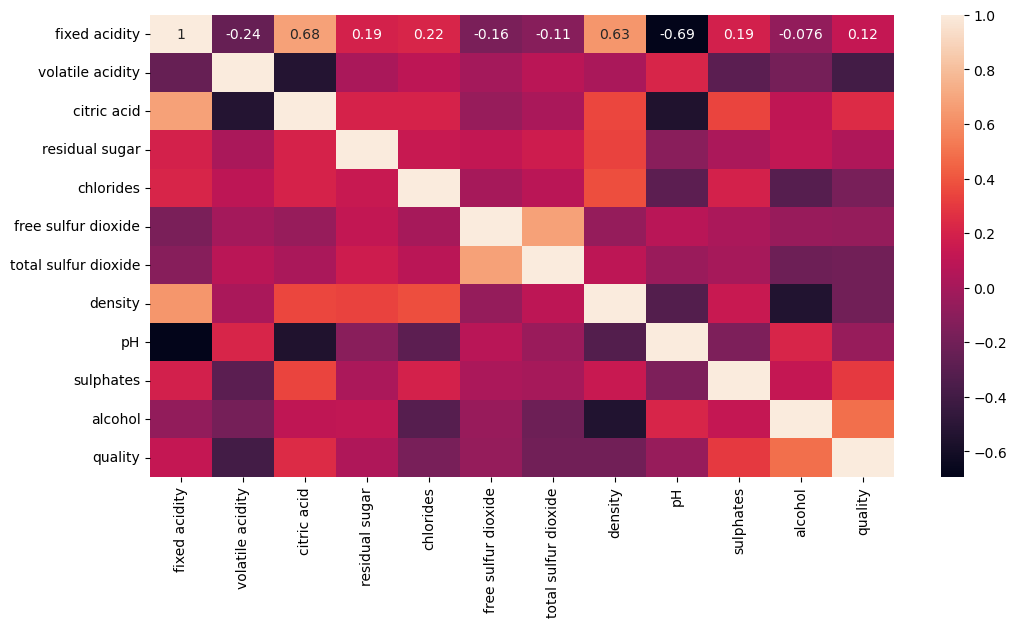

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(X.corr(),annot=True)

# Spliting  dataset 

In [23]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [33]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((914, 12), (229, 12), (914,), (229,))

## Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [36]:
y_predict=model.predict(X_test)

In [37]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [38]:
score=r2_score(Y_test,y_predict)
mae=mean_absolute_error(Y_test,y_predict)
mse=mean_squared_error(Y_test,y_predict)
print("R2 score is ",score)
print("Mean absolute error is ",mae)
print("Mean squared error ",mse)

R2 score is  0.13648774856442336
Mean absolute error is  341.9039216875246
Mean squared error  181232.56334909602
